# Analysis of Belle2 Data

In [1]:
import os, sys, pprint
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
!ls -l ../DATA/
!pwd

total 56352
-rwxr--r--  1 philipp philipp   584128 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_ccbar_0.root
-rwxr--r--  1 philipp philipp   117621 May 14 14:58 B0_etapr-eta-gg2pi_KS-pi+pi-_output_charged_17.root
-rwxr--r--  1 philipp philipp   155084 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_0.root
-rwxr--r--  1 philipp philipp   177149 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_1.root
-rwxr--r--  1 philipp philipp   183977 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_2.root
-rwxr--r--  1 philipp philipp   176779 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_3.root
-rwxr--r--  1 philipp philipp   185028 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_4.root
-rwxr--r--  1 philipp philipp   141664 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_5.root
-rwxr--r--  1 philipp philipp   192110 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_6.root
-rwxr--r--  1 philipp philipp   179731 May 14 14:52 B0_etapr-eta-gg2pi_KS-pi+pi-_output_DC_7.root

## 1. Reading and Prepairing Data

In [6]:
from root_pandas import read_root

path = '/home/philipp/Desktop/Project/DATA/'
SFiles = glob.glob(os.path.join(path, 'Signal/*.root'))
CFiles = glob.glob(os.path.join(path, 'Continuous/*.root'))
PFiles = glob.glob(os.path.join(path, 'Peaking/*.root'))

Full_Signal = pd.concat((read_root(f, 'B0') for f in SFiles))
Full_Signal = Full_Signal[Full_Signal['B0_isSignal']==1].reset_index(drop=True)
Full_Continuous = pd.concat((read_root(f, 'B0') for f in CFiles))
Full_Peaking = pd.concat((read_root(f, 'B0') for f in PFiles))

Welcome to JupyROOT 6.16/00


/home/philipp/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.16.4 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)
/home/philipp/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/root_pandas/readwrite.py:320: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


In [5]:
# Several branches organized in categories

General = ['exp_no', 'run_no', 'evt_no', 'nCands', 'iCand']
Masses = ['B0_M', 'B0_ErrM', 'B0_SigM', 'B0_K_S0_M', 'B0_K_S0_ErrM', 'B0_K_S0_SigM', 'B0_etap_M', 'B0_etap_ErrM', 
          'B0_etap_SigM', 'B0_etap_eta_M', 'B0_etap_eta_ErrM', 'B0_etap_eta_SigM']
Kinetics = ['B0_P', 'B0_P4', 'B0_deltae', 'B0_mbc', 'B0_etap_P', 'B0_etap_P4', 
            'B0_etap_eta_P', 'B0_etap_eta_P4', 'B0_etap_eta_gamma0_P', 'B0_etap_eta_gamma0_P4',
            'B0_etap_eta_gamma1_P', 'B0_etap_eta_gamma1_P4', 'B0_etap_pi0_P', 'B0_etap_pi0_P4',
            'B0_etap_pi1_P', 'B0_etap_pi1_P4', 'B0_K_S0_P', 'B0_K_S0_P4']
Kinetics_Training = ['B0_P', 'B0_deltae', 'B0_mbc', 'B0_etap_P',   'B0_etap_eta_P', 'B0_etap_eta_gamma0_P',
            'B0_etap_eta_gamma1_P', 'B0_etap_pi0_P', 'B0_etap_pi1_P', 'B0_K_S0_P']
Kinetics_comp = ['B0_P', 'B0_P40', 'B0_P41', 'B0_P42', 'B0_P43', 'B0_deltae', 'B0_mbc',
                 'B0_etap_P', 'B0_etap_P40', 'B0_etap_P41', 'B0_etap_P42','B0_etap_P43','B0_etap_eta_P',
                 'B0_etap_eta_P40', 'B0_etap_eta_P41', 'B0_etap_eta_P42', 'B0_etap_eta_P43',
                 'B0_etap_eta_gamma0_P', 'B0_etap_eta_gamma0_P40', 'B0_etap_eta_gamma0_P41', 
                 'B0_etap_eta_gamma0_P42', 'B0_etap_eta_gamma0_P43', 'B0_etap_eta_gamma1_P', 'B0_etap_eta_gamma1_P40',
                 'B0_etap_eta_gamma1_P41', 'B0_etap_eta_gamma1_P42', 'B0_etap_eta_gamma1_P43', 'B0_etap_pi0_P',
                 'B0_etap_pi0_P40', 'B0_etap_pi0_P41', 'B0_etap_pi0_P42', 'B0_etap_pi0_P43', 'B0_etap_pi1_P',
                 'B0_etap_pi1_P40', 'B0_etap_pi1_P41', 'B0_etap_pi1_P42', 'B0_etap_pi1_P43', 'B0_K_S0_P',
                 'B0_K_S0_P40', 'B0_K_S0_P41', 'B0_K_S0_P42', 'B0_K_S0_P43']
FourMomenta = ['B0_P4', 'B0_etap_P4', 'B0_etap_eta_P4', 'B0_etap_eta_gamma0_P4', 'B0_etap_eta_gamma1_P4', 
            'B0_etap_pi0_P4', 'B0_etap_pi1_P4', 'B0_K_S0_P4']
DecayAngles = ['B0_decayAngle__bo0__bc', 'B0_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo0__bc',
               'B0_etap_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo2__bc']
Positions = ['B0_X', 'B0_ErrX', 'B0_Y', 'B0_ErrY', 'B0_Z', 'B0_ErrZ', 'B0_Rho',  
             'B0_etap_X', 'B0_etap_ErrX', 'B0_etap_Y', 'B0_etap_ErrY', 
             'B0_etap_Z', 'B0_etap_ErrZ', 'B0_etap_Rho',
             'B0_etap_eta_X', 'B0_etap_eta_ErrX', 'B0_etap_eta_Y',
             'B0_etap_eta_ErrY', 'B0_etap_eta_Z', 'B0_etap_eta_ErrZ', 'B0_etap_eta_Rho',
             'B0_etap_pi0_X', 'B0_etap_pi0_ErrX', 'B0_etap_pi0_Y', 'B0_etap_pi0_ErrY', 
             'B0_etap_pi0_Z', 'B0_etap_pi0_ErrZ', 'B0_etap_pi0_Rho', 
             'B0_etap_pi1_X', 'B0_etap_pi1_ErrX', 'B0_etap_pi1_Y', 'B0_etap_pi1_ErrY', 
             'B0_etap_pi1_Z', 'B0_etap_pi1_ErrZ', 'B0_etap_pi1_Rho', 
             'B0_K_S0_X', 'B0_K_S0_ErrX', 'B0_K_S0_Y', 'B0_K_S0_ErrY', 'B0_K_S0_Z',
             'B0_K_S0_ErrZ', 'B0_K_S0_Rho', 
             'B0_cosAngleBetweenMomentumAndVertexVector', 'B0_distance', 'B0_significanceOfDistance',
             'B0_dr', 'B0_etap_pi0_dr', 'B0_etap_pi1_dr', 'B0_K_S0_dr']
Vertex = ['B0_VtxPvalue', 'B0_VtxProd', 'B0_VtxProdCov', 'B0_etap_VtxPvalue', 'B0_etap_VtxProd', 'B0_etap_VtxProdCov',
          'B0_etap_eta_VtxPvalue', 'B0_etap_eta_VtxProd', 'B0_etap_VtxProdCov', 
          'B0_etap_pi0_VtxPvalue', 'B0_etap_pi0_VtxProd', 'B0_etap_pi0_VtxProdCov', 
          'B0_etap_pi1_VtxPvalue', 'B0_etap_pi1_VtxProd', 'B0_etap_pi1_VtxProdCov', 
          'B0_K_S0_VtxPvalue', 'B0_K_S0_VtxProd', 'B0_K_S0_VtxProdCov']
Vertex_Training = ['B0_VtxPvalue', 'B0_etap_VtxPvalue', 'B0_etap_eta_VtxPvalue', 'B0_etap_pi0_VtxPvalue',
                   'B0_etap_pi1_VtxPvalue', 'B0_K_S0_VtxPvalue', ]
Continuum_Suppression = ['B0_CSMVA', 'B0_TrCSMVA']
Continuum_Suppression_Training = ['B0_TrCSMVA']


Filter = Masses + Kinetics + DecayAngles + Positions + Vertex + Continuum_Suppression
Training = Masses + Kinetics_Training + DecayAngles + Positions + Vertex_Training + Continuum_Suppression_Training

In [91]:
Branches = []
MC_Branches = []
Data_Branches = []
Kinetics_CMS = []
MC_Keywords = ['True', 'Truth', 'isRight', 'isSignal', 'isContinuum', 
               'isNotContinuum', 'MC', 'mc']
for Branch in Full_Signal.columns : 
    MC = False 
    Branches.append(Branch)
    for key in MC_Keywords : 
        if key in Branch :  MC = True
    if MC==True : MC_Branches.append(Branch)
    else :  Data_Branches.append(Branch)
        
Data_Branches = [b for b in Data_Branches if not b in General]
Arrays = []
for Branch in Data_Branches : 
    #print(type(Full_Signal[Branch][0]))
    if (type(Full_Signal[Branch][0]) is np.ndarray) : Arrays.append(Branch)
Data_Branches = [b for b in Data_Branches if not b in Arrays]

for Branch in Data_Branches: 
    print (Branch)
    
print (len(Data_Branches))

B0_K_S0_M
B0_K_S0_ErrM
B0_K_S0_SigM
B0_M
B0_ErrM
B0_SigM
B0_etap_M
B0_etap_ErrM
B0_etap_SigM
B0_etap_eta_M
B0_etap_eta_ErrM
B0_etap_eta_SigM
B0_etap_pi0_charge
B0_etap_pi1_charge
B0_P
B0_etap_P
B0_etap_eta_P
B0_etap_eta_gamma0_P
B0_etap_eta_gamma1_P
B0_etap_pi0_P
B0_etap_pi1_P
B0_K_S0_P
B0_deltae
B0_mbc
B0_Pcms
B0_etap_Pcms
B0_etap_eta_Pcms
B0_etap_eta_gamma0_Pcms
B0_etap_eta_gamma1_Pcms
B0_etap_pi0_Pcms
B0_etap_pi1_Pcms
B0_K_S0_Pcms
B0_decayAngle__bo0__bc
B0_decayAngle__bo1__bc
B0_etap_useRestFrame__bodaughter__bo0__cm__sppx__bc__bc
B0_etap_useRestFrame__bodaughter__bo0__cm__sppy__bc__bc
B0_etap_useRestFrame__bodaughter__bo0__cm__sppz__bc__bc
B0_etap_useRestFrame__bodaughter__bo0__cm__sppt__bc__bc
B0_etap_useRestFrame__bodaughter__bo0__cm__spE__bc__bc
B0_etap_useRestFrame__bodaughter__bo1__cm__sppx__bc__bc
B0_etap_useRestFrame__bodaughter__bo1__cm__sppy__bc__bc
B0_etap_useRestFrame__bodaughter__bo1__cm__sppz__bc__bc
B0_etap_useRestFrame__bodaughter__bo1__cm__sppt__bc__bc
B0_etap_useRe

In [69]:
print (type(Full_Signal['B0_P4'][0]))
print (type(Full_Signal['B0_P'][0]))
print (type(Full_Signal['B0_isSignal'][0]))

<class 'numpy.ndarray'>
<class 'numpy.float32'>
<class 'numpy.float32'>


### Choosing the best candidates in each event

Combinatorics in the reconstruction process often leads to events with multiple candidates, where we carefully have to choose the best without introducing significant bias. To do this we have two possible methods: 

- Choosing the candidate with the reconstructed mass closest to the nominal value
- Choosing the candidate with the best vertex fit

If we were only using the mass we would bias our data towards a very narrow mass peak in cases where two candidates are close to the nominal value. Therefore I suggest using the masses for a generous cut (e.g. $5\sigma$) and then using vertex information to pick the best candidate. 

##### Masses
Nominal masses with errors in GeV $ [M_{nominal}, \sigma_{M_{nominal}}] $ according to the [Particle Data Group](http://pdg.lbl.gov/2019/listings/contents_listings.html)

In events with more than one candidate we can use this to perform a rough cut on candidates requirering, that 

$$ 
M_{reconstructed} \in 
    \left[ M_{nominal} - 5 \times \left( \sigma_{M_{nominal}} + \sigma_{M_{reconstructed}} \right), 
           M_{nominal} + 5 \times \left( \sigma_{M_{nominal}} + \sigma_{M_{reconstructed}} \right) \right]
$$



In [7]:
M_B0 = [5.27955, 0.00026]
M_K0 = [0.497611, 0.000013]
M_etap = [0.95778, 0.00006]
M_eta = [0.547862, 0.000017]

In [ ]:
# Right now we don't use any pre-selection on our data. 
# If we did, this would be a reasonable approach

#Signal = Signal[abs(Signal['B0_M'] - M_B0[0]) < 5 * Signal['B0_ErrM']]
#Signal = Signal[abs(Signal['B0_K_S0_M'] - M_K0[0]) < 5 * Signal['B0_K_S0_ErrM']]
#Signal = Signal[abs(Signal['B0_etap_M'] - M_etap[0]) < 5 * Signal['B0_etap_ErrM']]
#Signal = Signal[abs(Signal['B0_etap_eta_M'] - M_eta[0]) < 5 * Signal['B0_etap_eta_ErrM']]

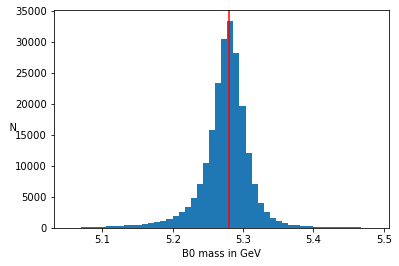

In [26]:
import matplotlib.pyplot as plt

num_bins = 50
n, bins, patches = plt.hist(Full_Signal['B0_M'], num_bins)
plt.xlabel('B0 mass in GeV')
plt.ylabel('N', rotation=180)
plt.axvline(x=M_B0[0], ymin=0, ymax=35000, color='r')
plt.show()

##### Vertex

I need to take a closer look at the vertex information to decide how to use it

In [ ]:
# Do stuff

#### Filtering the Signal and chosing variables to train
- We filter the Signal, as we are only interested in correctly reconstructed events
- We choose variables for the training
- We convert arrays to 4 variables

In [ ]:
# This turns the array of the 4 momenta in separate variables. We don't use the 4 momentum anymore...
#for M in FourMomenta: 
#    Full_Signal[M+'0'], Full_Signal[M+'1'], Full_Signal[M+'2'], Full_Signal[M+'3'] = zip(*Full_Signal.pop(M))
#    Full_Continuous[M+'0'], Full_Continuous[M+'1'], Full_Continuous[M+'2'], Full_Continuous[M+'3'] = zip(*Full_Continuous.pop(M))
#    Full_Peaking[M+'0'], Full_Peaking[M+'1'], Full_Peaking[M+'2'], Full_Peaking[M+'3'] = zip(*Full_Peaking.pop(M))

In [79]:
Selection_Signal = Full_Signal[Data_Branches]
Selection_Continuous = Full_Continuous[Data_Branches]
Selection_Peaking = Full_Peaking[Data_Branches]

#Signal_comp = pd.concat([pd.DataFrame(Signal_Pure[c].tolist()).add_prefix(c[:c.index('4')]).add_suffix(c[c.index('4')+1:]) if '4' in c else Signal_Pure[c] for c in Signal_Pure], axis=1)
#Background_comp = pd.concat([pd.DataFrame(Background[c].tolist()).add_prefix(c[:c.index('4')]).add_suffix(c[c.index('4')+1:]) if '4' in c else Background[c] for c in Background], axis=1)

In [40]:
from IPython.display import display
pd.options.display.max_columns = None
display(Selection_Signal)

,B0_M,B0_ErrM,B0_SigM,B0_K_S0_M,B0_K_S0_ErrM,B0_K_S0_SigM,B0_etap_M,B0_etap_ErrM,B0_etap_SigM,B0_etap_eta_M,B0_etap_eta_ErrM,B0_etap_eta_SigM,B0_P,B0_deltae,B0_mbc,B0_etap_P,B0_etap_eta_P,B0_etap_eta_gamma0_P,B0_etap_eta_gamma1_P,B0_etap_pi0_P,B0_etap_pi1_P,B0_K_S0_P,B0_decayAngle__bo0__bc,B0_decayAngle__bo1__bc,B0_etap_decayAngle__bo0__bc,B0_etap_decayAngle__bo1__bc,B0_etap_decayAngle__bo2__bc,B0_X,B0_ErrX,B0_Y,B0_ErrY,B0_Z,B0_ErrZ,B0_Rho,B0_etap_X,B0_etap_ErrX,B0_etap_Y,B0_etap_ErrY,B0_etap_Z,B0_etap_ErrZ,B0_etap_Rho,B0_etap_eta_X,B0_etap_eta_ErrX,B0_etap_eta_Y,B0_etap_eta_ErrY,B0_etap_eta_Z,B0_etap_eta_ErrZ,B0_etap_eta_Rho,B0_etap_pi0_X,B0_etap_pi0_ErrX,B0_etap_pi0_Y,B0_etap_pi0_ErrY,B0_etap_pi0_Z,B0_etap_pi0_ErrZ,B0_etap_pi0_Rho,B0_etap_pi1_X,B0_etap_pi1_ErrX,B0_etap_pi1_Y,B0_etap_pi1_ErrY,B0_etap_pi1_Z,B0_etap_pi1_ErrZ,B0_etap_pi1_Rho,B0_K_S0_X,B0_K_S0_ErrX,B0_K_S0_Y,B0_K_S0_ErrY,B0_K_S0_Z,B0_K_S0_ErrZ,B0_K_S0_Rho,B0_cosAngleBetweenMomentumAndVertexVector,B0_distance,B0_significanceOfDistance,B0_dr,B0_etap_pi0_dr,B0_etap_pi1_dr,B0_K_S0_dr,B0_VtxPvalue,B0_etap_VtxPvalue,B0_etap_eta_VtxPvalue,B0_etap_pi0_VtxPvalue,B0_etap_pi1_VtxPvalue,B0_K_S0_VtxPvalue,B0_TrCSMVA
0,5.307438,0.015551,1.794601,0.497874,0.003358,0.077336,0.962908,0.002699,1.944490,0.542071,0.010025,-0.576791,1.602125,0.028394,5.278986,3.066705,2.075677,1.225226,0.905440,0.699465,0.334137,2.277444,0.488507,-0.488507,0.568254,0.079900,-0.670724,-0.002149,0.001303,-1.066588e-09,0.000004,-0.014420,0.007413,0.002149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001742,0.004913,0.001482,0.004186,-0.009292,0.007839,0.002287,0.003826,0.011587,-0.000924,0.002779,-0.019859,0.012930,0.003936,-3.503684,0.056161,-8.044307,0.127328,-0.092195,0.085395,8.774205,-0.977685,0.014580,1.943959,0.002149,0.002287,0.003936,8.774205,6.053036e-04,4.801615e-02,5.644614e-01,5.343583e-01,0.361941,6.989494e-03,-2.833126
1,5.229204,0.032386,-1.553946,0.490416,0.014302,-0.503305,0.977696,0.009197,2.178594,0.486767,0.011250,-5.429974,1.770375,-0.039430,5.268792,1.871150,0.913500,0.395340,0.561874,0.461770,0.615245,3.383169,-0.857668,0.857668,-0.527525,0.403934,0.673270,0.006748,0.001236,-2.922411e-09,0.000004,0.045094,0.006744,0.006748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006379,0.007717,-0.004306,0.005148,0.063782,0.012361,0.007697,0.000264,0.003745,0.000230,0.003256,0.034392,0.007308,0.000350,6.129555,0.255150,-7.030197,0.321926,16.094391,0.691816,9.327116,0.971280,0.045596,6.678820,0.006748,0.007697,0.000350,9.327117,1.814637e-01,2.815941e-02,5.980884e-08,7.179064e-01,0.958767,9.333900e-01,0.227573
2,5.267826,0.012465,-0.938999,0.497261,0.003568,-0.098962,0.957618,0.003712,-0.011401,0.508457,0.009905,-3.977389,1.462492,-0.008629,5.276476,2.782038,1.557186,0.843988,0.710492,0.677156,0.583644,2.475380,0.203863,-0.203863,-0.212969,0.754136,-0.192931,0.003960,0.010152,1.343392e-10,0.000004,0.025814,0.066676,0.003960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.041917,0.046557,0.009388,0.010619,0.040045,0.180281,0.042955,-0.035149,0.040243,0.029613,0.034197,-0.151886,0.166653,0.045961,-0.766622,0.014066,-6.539565,0.072670,-0.810397,0.124342,6.584346,0.968860,0.026116,0.387239,0.003960,0.042955,0.045961,6.584347,4.248845e-01,9.994511e-01,7.340705e-05,5.041033e-01,0.522255,2.304620e-01,2.639780
3,5.242138,0.017393,-2.149755,0.493500,0.011296,-0.364243,0.961774,0.003132,1.313378,0.547946,0.010651,0.008702,1.514491,-0.035768,5.277987,2.556790,1.992206,1.463006,0.603392,0.417004,0.199408,2.680938,-0.089340,0.089340,0.806590,-0.218116,-0.850400,-0.018233,0.001563,-1.143547e-08,0.000004,-0.116448,0.009505,0.018233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.083225,0.007082,-0.036418,0.002565,-0.116987,0.010439,0.090844,-0.012136,0.020035,-0.000107,0.000108,0.073781,0.048236,0.012137,10.478592,0.485756,-22.969173,1.156161,2.622428,0.291536,25.246462,-0.972638,0.117867,12.262980,0.018233,0.090844,0.012137,25.246462,7.336494e-23,1.682415e-0

### Preprocessing the Data
1. Labelling the Data (0 for peaking background, 1 for continuous background and 2 for Signal)
2. Splitting it in train and test data
3. removing the label from testing
4. Scaling it and removing the mean

In [30]:
from random import seed
from random import randint
# seed random number generator
n_seed=1234
seed(n_seed)

In [80]:
Selection_Signal['Type'] = 2
Selection_Continuous['Type'] = 1
Selection_Peaking['Type'] = 0

/home/philipp/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/philipp/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/philipp/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [81]:
from sklearn.model_selection import train_test_split

Sum_BS = pd.concat([Selection_Signal, Selection_Continuous, Selection_Peaking]).sample(frac=1)
X = Sum_BS.drop('Type',axis=1)
Y = Sum_BS['Type']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, train_size=0.8,random_state=randint(10**6,10**9))

In [82]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
print(ss.fit(X_Train))
X_Train = ss.transform(X_Train)
X_Test = ss.transform(X_Test)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [83]:
from keras.utils import to_categorical
Y_Train, Y_Test = to_categorical(Y_Train, num_classes=3), to_categorical(Y_Test, num_classes=3)

In [47]:
display(Y_Train[0])

array([0., 1., 0.], dtype=float32)

### Principal Component Analysis to reduce the number of input parameters

Here we will try to perform a Principal Component Analysis (PCA) on some of the categories of branches to reduce the number of dimensionality where possible

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
principalComponents = pca.fit_transform(X_Train)
principalDf = pd.DataFrame(data = principalComponents)
pca.explained_variance_ratio_

array([0.05613105, 0.04765749, 0.04098364, 0.03186598, 0.0306905 ,
       0.02380629, 0.02356248, 0.0225887 , 0.02212198, 0.01957699,
       0.01589498, 0.01562148, 0.01527562, 0.01367104, 0.01302041,
       0.01289572, 0.01270063, 0.01189407, 0.01170548, 0.01164047,
       0.01133448, 0.01047441, 0.00999801, 0.00981226, 0.00965641,
       0.00948034, 0.00920343, 0.00913645, 0.00877556, 0.00869084,
       0.00855009, 0.00834352, 0.00832814, 0.00804499, 0.00792225,
       0.00771571, 0.0076844 , 0.00743704, 0.00740905, 0.00728796,
       0.0071131 , 0.00707221, 0.00702006, 0.00683426, 0.00662282,
       0.00649107, 0.0061095 , 0.00595575, 0.00593795, 0.00590676,
       0.00554559, 0.00554339, 0.00552523, 0.0055012 , 0.00546967,
       0.00536496, 0.00530314, 0.00522121, 0.00517635, 0.00512606,
       0.0050527 , 0.00493656, 0.0048968 , 0.00489072, 0.00477937,
       0.00472137, 0.00464028, 0.00458171, 0.00448374, 0.00443351,
       0.00442746, 0.00438767, 0.00436491, 0.00432306, 0.00431

In [90]:
sum(pca.explained_variance_ratio_)

0.911172929356559

## Create the Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(116, activation=tf.nn.relu),
    keras.layers.Dense(150, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam', 
              loss='kullback_leibler_divergence',
              metrics=['accuracy'])


In [ ]:
X_train.shape

In [ ]:
model.fit(X_train, Y_train, epochs=25)

### Evaluate Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)